# photometry_bkgS3plot.ipynb

開口測光したデータをプロットする。横軸は衛星のSys3経度。

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import copy
import ftpS3
import spiceypy as spice
spice.furnsh('kernel/cassMetaK.txt')

fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                    'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })


# cpalette = ['#8ecae6', '#ffb703', '#023047', '#fb8500', '#219ebc']
cpalette = ['#0F4C81', '#FF6F61', '#645394',
         '#84BD00', '#F6BE00', '#F7CAC9', '#0F80E6']

In [2]:
north_doy = ['2014/001_v01', '2014/002_v02', '2014/005_v05', '2014/006_v06', '2014/013_v13', '2014/016_v12', '2022/185_v10', '2022/228_v13', '2022/271_v18', '2022/274_v17', '2022/309_v20', '2022/349_v24']
south_doy = ['2022/140_v03', '2022/185_v09', '2022/186_v11', '2022/229_v14', '2022/310_v19', '2022/311_v21', '2022/349_v23']

def load(csvname0):
    df = pd.read_csv(csvname0, sep='\t')
    utc = df.loc[:, 'date']                                 # UTC date
    efplat = df.loc[:, 'lat [deg]'].values                  # EFP latitude [deg]
    efpwlong = df.loc[:, 'wlong [deg]'].values              # EFP System III longitude [deg]
    moons3 = df.loc[:, 'Moon S3 [deg]'].values              # Europa's System III longitude [deg]
    final_phot_ave = df.loc[:, 'spot brightness [kR]']      # EFP brightness [kR]
    annulus_median = df.loc[:, 'local background [kR]']     # local background [kR]
    
    b0_arr = np.zeros(len(final_phot_ave))
    b1_arr = np.zeros(len(final_phot_ave))
    efplat0_arr = np.zeros(len(final_phot_ave))
    efpwlong0_arr = np.zeros(len(final_phot_ave))
    moons30_arr = np.zeros(len(final_phot_ave))
    for i in range(len(final_phot_ave)):
        if final_phot_ave[i] != '0':
            b0_arr[i] = final_phot_ave[i]
            b1_arr[i] = annulus_median[i]
            efplat0_arr[i] = efplat[i]
            efpwlong0_arr[i] = efpwlong[i]
            moons30_arr[i] = moons3[i]
        else:
            continue
    
    return utc, b0_arr, b1_arr, efplat0_arr, efpwlong0_arr, moons30_arr

JRM33計算結果

磁気赤道面crossingのSys3 [deg] 110.61452513966482

磁場成分 Br 最大のSys3 [deg] 189.05027932960894

磁気赤道面crossingのSys3 [deg] 281.56424581005587

スポット内トータル

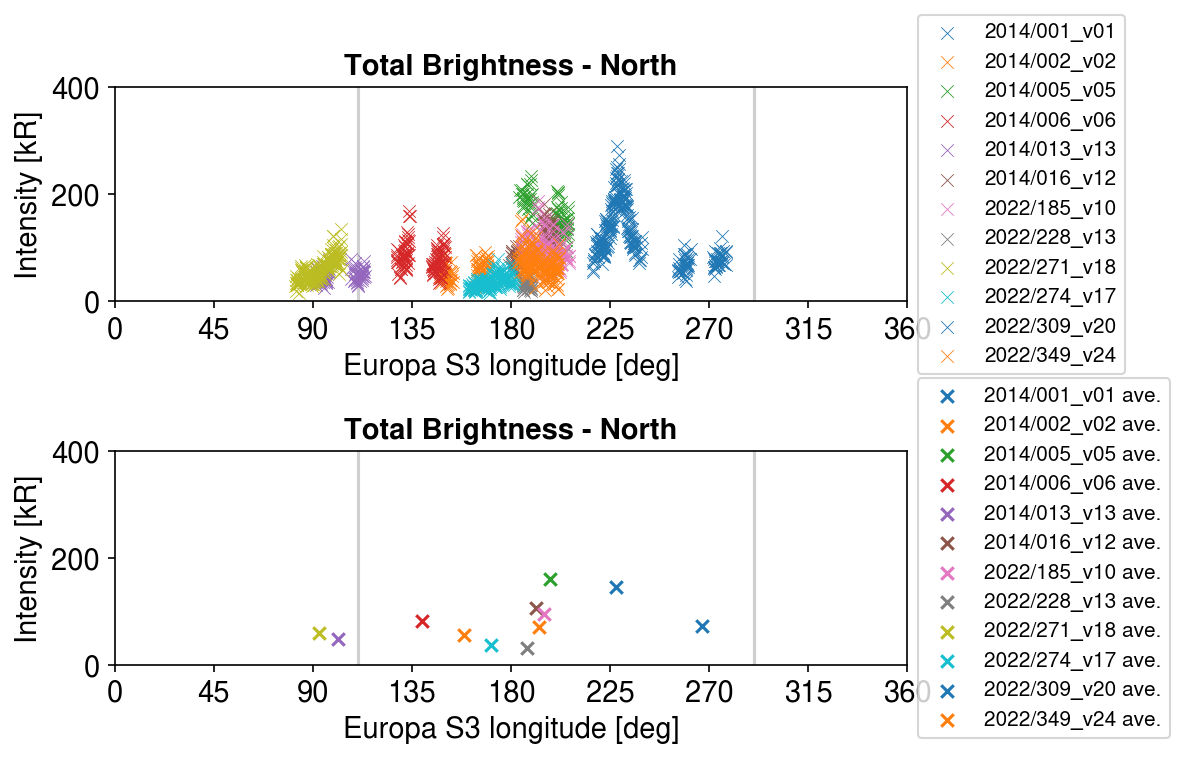

In [10]:
hem = 'North'
if hem == 'North':
    doy = north_doy
elif hem == 'South':
    doy = south_doy
else:
    doy = north_doy+south_doy

fontsize = 14
fig, ax = plt.subplots(2,1, figsize=(8,5), dpi=150)
ax[0].set_title('Total Brightness - '+hem, weight='bold', fontsize=fontsize)
ax[0].set_xlim(0,360)
ax[0].set_ylim(0,400)
# ax.set_yticks(np.linspace(-10,200,5))
# ax.set_yticklabels(np.linspace(-10,200,5))
ax[0].set_xticks(np.linspace(0,360,9))
ax[0].set_xticklabels(np.linspace(0,360,9, dtype=int))
ax[0].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[0].set_ylabel('Intensity [kR]', fontsize=fontsize)
ax[0].tick_params(axis='x', labelsize=fontsize)
ax[0].tick_params(axis='y', labelsize=fontsize)
for i in range(len(doy)):
    csvname0 = 'img/bkgS3/EUROPA/'+doy[i]+'/brightness.csv'
    utc, b0_arr, b1_arr, efplat0_arr, efpwlong0_arr, moons30_arr = load(csvname0)
    idx = np.where(b0_arr>0)
    efplat0_arr = efplat0_arr[idx]
    efpwlong0_arr = efpwlong0_arr[idx]
    moons30_arr = moons30_arr[idx]
    b0_arr = b0_arr[idx]
    b1_arr = b1_arr[idx]
    ax[0].scatter(moons30_arr, b0_arr+b1_arr, marker='x', linewidths=0.4, label=doy[i], zorder=1)
ax[0].axvline(x=110.61452513966482, color='#cfcfcf', zorder=0.5)
ax[0].axvline(x=110.61452513966482+180, color='#cfcfcf', zorder=0.5)
ax[0].legend(loc='center left', bbox_to_anchor=(1., .5))

ax[1].set_title('Total Brightness - '+hem, weight='bold', fontsize=fontsize)
ax[1].set_xlim(0,360)
ax[1].set_ylim(0,400)
# ax.set_yticks(np.linspace(-10,200,5))
# ax.set_yticklabels(np.linspace(-10,200,5))
ax[1].set_xticks(np.linspace(0,360,9))
ax[1].set_xticklabels(np.linspace(0,360,9, dtype=int))
ax[1].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[1].set_ylabel('Intensity [kR]', fontsize=fontsize)
ax[1].tick_params(axis='x', labelsize=fontsize)
ax[1].tick_params(axis='y', labelsize=fontsize)
for i in range(len(doy)):
    csvname0 = 'img/bkgS3/EUROPA/'+doy[i]+'/brightness.csv'
    utc, b0_arr, b1_arr, efplat0_arr, efpwlong0_arr, moons30_arr = load(csvname0)
    idx = np.where(b0_arr>0)
    efplat0_ave = np.average(efplat0_arr[idx])
    efpwlong0_ave = np.average(efpwlong0_arr[idx])
    moons30_ave = np.average(moons30_arr[idx])
    b0_ave = np.average(b0_arr[idx])
    b1_ave = np.average(b1_arr[idx])
    ax[1].scatter(moons30_ave, b0_ave+b1_ave, marker='x', label=doy[i]+' ave.', zorder=1)
ax[1].axvline(x=110.61452513966482, color='#cfcfcf', zorder=0.5)
ax[1].axvline(x=110.61452513966482+180, color='#cfcfcf', zorder=0.5)
ax[1].legend(loc='center left', bbox_to_anchor=(1., .5))
fig.tight_layout()
plt.show()

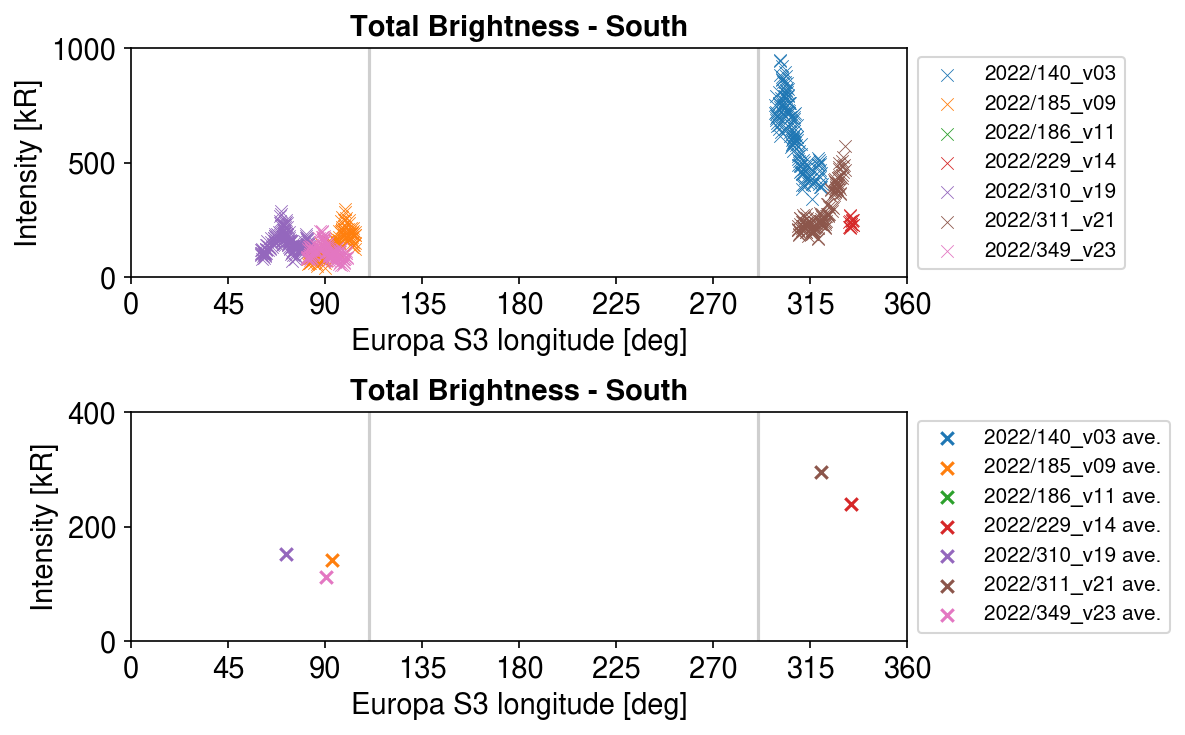

In [9]:
hem = 'South'
if hem == 'North':
    doy = north_doy
elif hem == 'South':
    doy = south_doy
else:
    doy = north_doy+south_doy

fontsize = 14
fig, ax = plt.subplots(2,1, figsize=(8,5), dpi=150)
ax[0].set_title('Total Brightness - '+hem, weight='bold', fontsize=fontsize)
ax[0].set_xlim(0,360)
ax[0].set_ylim(0,1000)
# ax.set_yticks(np.linspace(-10,200,5))
# ax.set_yticklabels(np.linspace(-10,200,5))
ax[0].set_xticks(np.linspace(0,360,9))
ax[0].set_xticklabels(np.linspace(0,360,9, dtype=int))
ax[0].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[0].set_ylabel('Intensity [kR]', fontsize=fontsize)
ax[0].tick_params(axis='x', labelsize=fontsize)
ax[0].tick_params(axis='y', labelsize=fontsize)
for i in range(len(doy)):
    csvname0 = 'img/bkgS3/EUROPA/'+doy[i]+'/brightness.csv'
    utc, b0_arr, b1_arr, efplat0_arr, efpwlong0_arr, moons30_arr = load(csvname0)
    idx = np.where(b0_arr>0)
    efplat0_arr = efplat0_arr[idx]
    efpwlong0_arr = efpwlong0_arr[idx]
    moons30_arr = moons30_arr[idx]
    b0_arr = b0_arr[idx]
    b1_arr = b1_arr[idx]
    ax[0].scatter(moons30_arr, b0_arr+b1_arr, marker='x', linewidths=0.4, label=doy[i], zorder=1)
ax[0].axvline(x=110.61452513966482, color='#cfcfcf', zorder=0.5)
ax[0].axvline(x=110.61452513966482+180, color='#cfcfcf', zorder=0.5)
ax[0].legend(loc='center left', bbox_to_anchor=(1., .5))

ax[1].set_title('Total Brightness - '+hem, weight='bold', fontsize=fontsize)
ax[1].set_xlim(0,360)
ax[1].set_ylim(0,400)
# ax.set_yticks(np.linspace(-10,200,5))
# ax.set_yticklabels(np.linspace(-10,200,5))
ax[1].set_xticks(np.linspace(0,360,9))
ax[1].set_xticklabels(np.linspace(0,360,9, dtype=int))
ax[1].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[1].set_ylabel('Intensity [kR]', fontsize=fontsize)
ax[1].tick_params(axis='x', labelsize=fontsize)
ax[1].tick_params(axis='y', labelsize=fontsize)
for i in range(len(doy)):
    csvname0 = 'img/bkgS3/EUROPA/'+doy[i]+'/brightness.csv'
    utc, b0_arr, b1_arr, efplat0_arr, efpwlong0_arr, moons30_arr = load(csvname0)
    idx = np.where(b0_arr>0)
    efplat0_ave = np.average(efplat0_arr[idx])
    efpwlong0_ave = np.average(efpwlong0_arr[idx])
    moons30_ave = np.average(moons30_arr[idx])
    b0_ave = np.average(b0_arr[idx])
    b1_ave = np.average(b1_arr[idx])
    ax[1].scatter(moons30_ave, b0_ave+b1_ave, marker='x', label=doy[i]+' ave.', zorder=1)
ax[1].axvline(x=110.61452513966482, color='#cfcfcf', zorder=0.5)
ax[1].axvline(x=110.61452513966482+180, color='#cfcfcf', zorder=0.5)
ax[1].legend(loc='center left', bbox_to_anchor=(1., .5))
fig.tight_layout()
plt.show()